In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import scipy

In [2]:
import seaborn as sns
from matplotlib import rc
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style('ticks')
import matplotlib.font_manager
for font in matplotlib.font_manager.findSystemFonts(
    '/Users/deepak/Library/Fonts/'):
    matplotlib.font_manager.fontManager.addfont(font)
font = {
    'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

In [3]:
def plot(model, num_prompt_tokens):
    plt.figure(figsize=(7.5, 4))
    all_num_output_tokens = [1, 2, 4, 8, 16, 32, 64]
    all_runtimes = []
    tokenizer = "ai21_j1" if model.startswith("ai21") else "huggingface_gpt2"
    random = "None"
    coefficients_of_variation = []
    print(f"{model}, prompt_size={num_prompt_tokens}")
    try:
        for i, num_output_tokens in enumerate(all_num_output_tokens[::-1]):
            with open(
                os.path.join(
                    "../benchmark_output",
                    "runs",
                    "latest",
                    (
                        f"synthetic_efficiency:tokenizer={tokenizer},"
                        f"num_prompt_tokens={num_prompt_tokens},"
                        f"num_output_tokens={num_output_tokens},"
                        f"random={random},"
                        f"model={model.replace('/', '_')}"
                    ),
                    "per_instance_stats.json",
                ),
                "r",
            ) as f:
                runtimes = []
                all_instance_stats = json.load(f)
                for per_instance_stats in all_instance_stats:
                    runtime = None
                    num_output_tokens_in_per_instance_metrics = None
                    stats = per_instance_stats["stats"]
                    for stat in stats:
                        if stat["name"]["name"] == "inference_runtime":
                            runtime = stat["mean"]
                        if stat["name"]["name"] == "num_output_tokens":
                            num_output_tokens_in_per_instance_metrics = stat["mean"]
                    if num_output_tokens_in_per_instance_metrics == num_output_tokens:
                        if runtime is not None:
                            runtimes.append(runtime) 
                plt.scatter(runtimes, [i + 1 for _ in range(len(runtimes))])
                print(f"{model}, {num_output_tokens}, "
                      f"{scipy.stats.variation(runtimes):.2f}")
                coefficients_of_variation.append(scipy.stats.variation(runtimes))
                all_runtimes.append(runtimes)
        print(f"Average coefficient of variation: {np.mean(coefficients_of_variation):.2f}")
        plt.yticks(
            list(range(1, len(all_num_output_tokens) + 1)), all_num_output_tokens[::-1]
        )
        plt.xlabel("Runtime (seconds)")
        plt.ylabel("Number of\noutput tokens")
        plt.xlim(0, None)
        sns.despine()

        plt.savefig(f"../figures/per_instance_runtime_variance/{model.replace('/', '-')},num_input_tokens={num_prompt_tokens}.pdf",
                    bbox_inches="tight")
        plt.show()
    except Exception as e:
        print(e)

ai21/j1-large, prompt_size=1
ai21/j1-large, 64, 0.01
ai21/j1-large, 32, 0.04
ai21/j1-large, 16, 0.06
ai21/j1-large, 8, 0.50
ai21/j1-large, 4, 0.06
ai21/j1-large, 2, 0.11
ai21/j1-large, 1, 0.10
Average coefficient of variation: 0.13


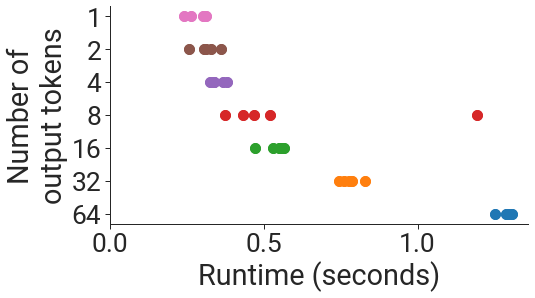

ai21/j1-large, prompt_size=256
ai21/j1-large, 64, 0.39
ai21/j1-large, 32, 0.34
ai21/j1-large, 16, 0.52
ai21/j1-large, 8, 0.17
ai21/j1-large, 4, 0.52
ai21/j1-large, 2, 0.89
ai21/j1-large, 1, 0.54
Average coefficient of variation: 0.48


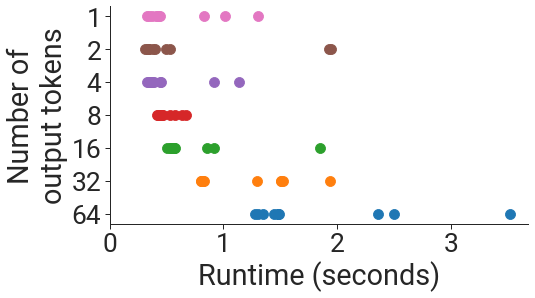

ai21/j1-large, prompt_size=512
ai21/j1-large, 64, 0.02
ai21/j1-large, 32, 0.04
ai21/j1-large, 16, 0.09
ai21/j1-large, 8, 0.23
ai21/j1-large, 4, 0.08
ai21/j1-large, 2, 0.53
ai21/j1-large, 1, 0.09
Average coefficient of variation: 0.15


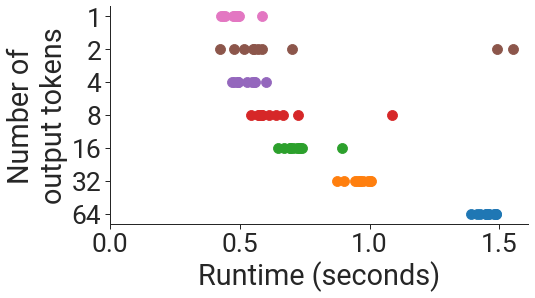

ai21/j1-large, prompt_size=1024
ai21/j1-large, 64, 0.04
ai21/j1-large, 32, 0.07
ai21/j1-large, 16, 0.38
ai21/j1-large, 8, 0.24
ai21/j1-large, 4, 0.17
ai21/j1-large, 2, 0.08
ai21/j1-large, 1, 0.19
Average coefficient of variation: 0.17


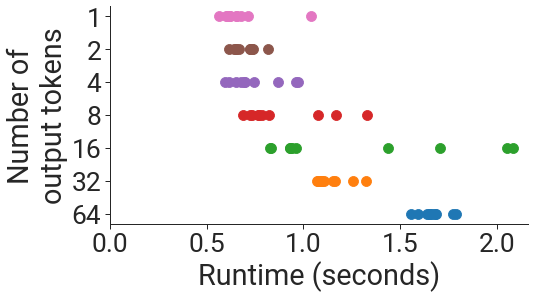

ai21/j1-large, prompt_size=1536
ai21/j1-large, 64, 0.03
ai21/j1-large, 32, 0.05
ai21/j1-large, 16, 0.24
ai21/j1-large, 8, 0.25
ai21/j1-large, 4, 0.08
ai21/j1-large, 2, 0.14
ai21/j1-large, 1, 0.23
Average coefficient of variation: 0.15


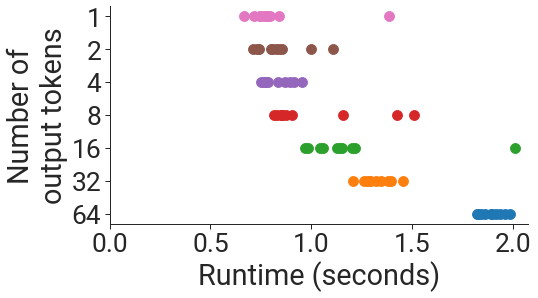

ai21/j1-grande, prompt_size=1
ai21/j1-grande, 64, 0.35
ai21/j1-grande, 32, 0.61
ai21/j1-grande, 16, 0.99
ai21/j1-grande, 8, 0.46
ai21/j1-grande, 4, 0.62
ai21/j1-grande, 2, 0.05
ai21/j1-grande, 1, 0.78
Average coefficient of variation: 0.55


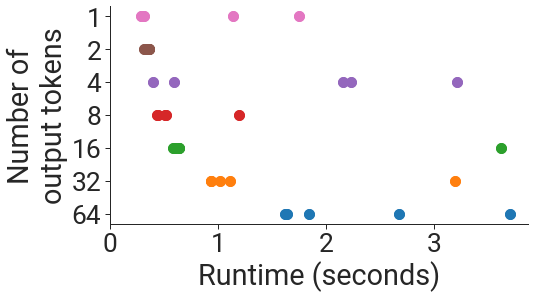

ai21/j1-grande, prompt_size=256
ai21/j1-grande, 64, 0.41
ai21/j1-grande, 32, 0.24
ai21/j1-grande, 16, 0.31
ai21/j1-grande, 8, 0.57
ai21/j1-grande, 4, 0.53
ai21/j1-grande, 2, 0.31
ai21/j1-grande, 1, 0.65
Average coefficient of variation: 0.43


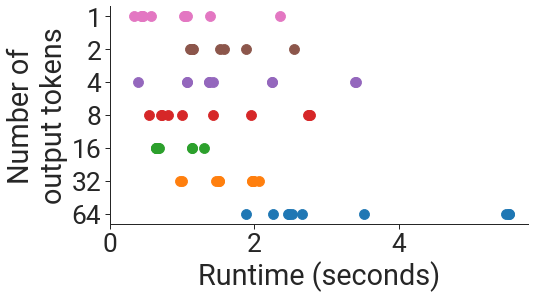

ai21/j1-grande, prompt_size=512
ai21/j1-grande, 64, 0.30
ai21/j1-grande, 32, 0.39
ai21/j1-grande, 16, 0.51
ai21/j1-grande, 8, 0.67
ai21/j1-grande, 4, 0.68
ai21/j1-grande, 2, 0.55
ai21/j1-grande, 1, 0.88
Average coefficient of variation: 0.57


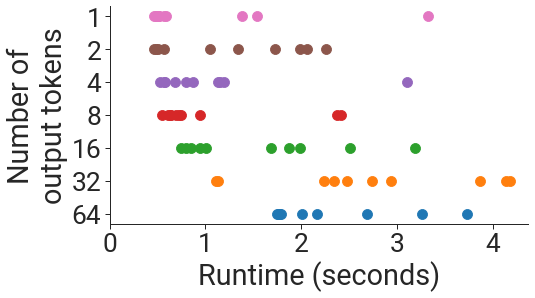

ai21/j1-grande, prompt_size=1024
ai21/j1-grande, 64, 0.34
ai21/j1-grande, 32, 0.53
ai21/j1-grande, 16, 0.48
ai21/j1-grande, 8, 0.61
ai21/j1-grande, 4, 0.63
ai21/j1-grande, 2, 0.73
ai21/j1-grande, 1, 0.40
Average coefficient of variation: 0.53


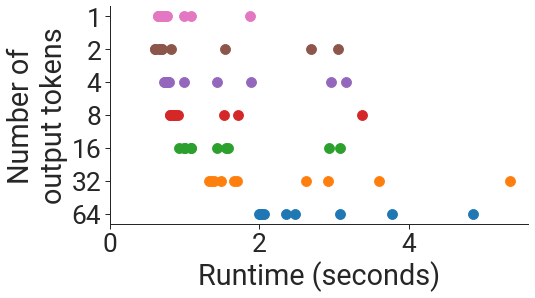

ai21/j1-grande, prompt_size=1536
ai21/j1-grande, 64, 0.44
ai21/j1-grande, 32, 0.61
ai21/j1-grande, 16, 0.28
ai21/j1-grande, 8, 0.54
ai21/j1-grande, 4, 0.44
ai21/j1-grande, 2, 0.74
ai21/j1-grande, 1, 0.49
Average coefficient of variation: 0.51


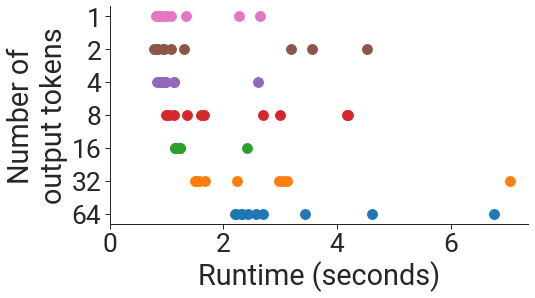

ai21/j1-jumbo, prompt_size=1
ai21/j1-jumbo, 64, 0.04
ai21/j1-jumbo, 32, 0.02
ai21/j1-jumbo, 16, 0.15
ai21/j1-jumbo, 8, 0.06
ai21/j1-jumbo, 4, 0.92
ai21/j1-jumbo, 2, 1.05
ai21/j1-jumbo, 1, 0.12
Average coefficient of variation: 0.34


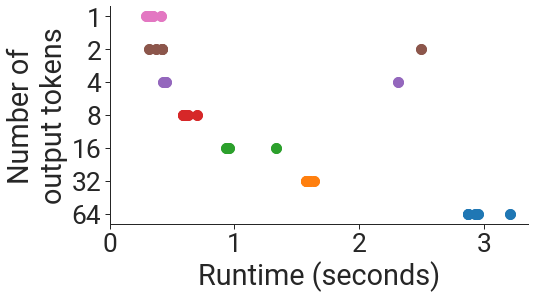

ai21/j1-jumbo, prompt_size=256
ai21/j1-jumbo, 64, 0.04
ai21/j1-jumbo, 32, 0.29
ai21/j1-jumbo, 16, 0.23
ai21/j1-jumbo, 8, 0.19
ai21/j1-jumbo, 4, 0.17
ai21/j1-jumbo, 2, 0.93
ai21/j1-jumbo, 1, 0.66
Average coefficient of variation: 0.36


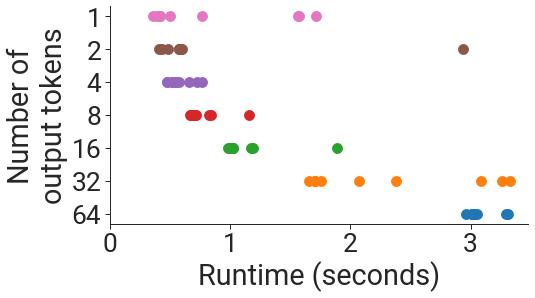

ai21/j1-jumbo, prompt_size=512
ai21/j1-jumbo, 64, 0.03
ai21/j1-jumbo, 32, 0.04
ai21/j1-jumbo, 16, 0.04
ai21/j1-jumbo, 8, 0.04
ai21/j1-jumbo, 4, 0.23
ai21/j1-jumbo, 2, 0.08
ai21/j1-jumbo, 1, 0.06
Average coefficient of variation: 0.08


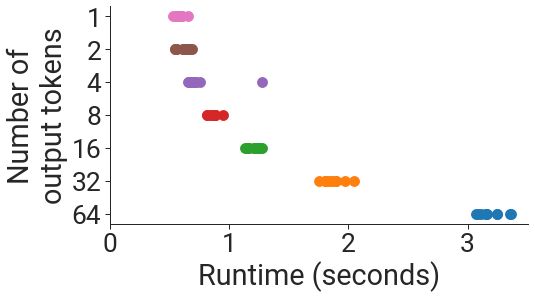

ai21/j1-jumbo, prompt_size=1024
ai21/j1-jumbo, 64, 0.07
ai21/j1-jumbo, 32, 0.12
ai21/j1-jumbo, 16, 0.13
ai21/j1-jumbo, 8, 0.46
ai21/j1-jumbo, 4, 0.13
ai21/j1-jumbo, 2, 0.09
ai21/j1-jumbo, 1, 0.74
Average coefficient of variation: 0.25


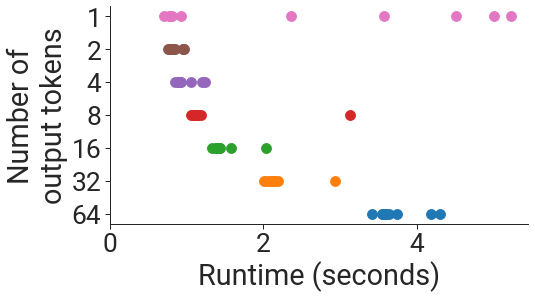

ai21/j1-jumbo, prompt_size=1536
ai21/j1-jumbo, 64, 0.17
ai21/j1-jumbo, 32, 0.22
ai21/j1-jumbo, 16, 0.22
ai21/j1-jumbo, 8, 0.10
ai21/j1-jumbo, 4, 0.87
ai21/j1-jumbo, 2, 0.08
ai21/j1-jumbo, 1, 0.11
Average coefficient of variation: 0.25


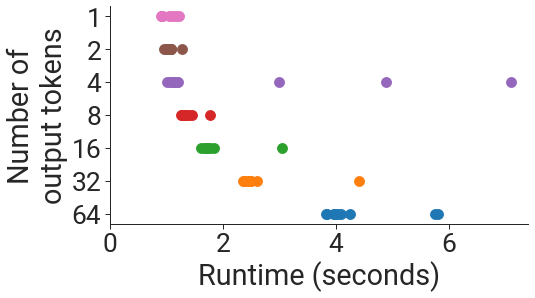

openai/davinci, prompt_size=1
openai/davinci, 64, 0.10
openai/davinci, 32, 0.14
openai/davinci, 16, 0.17
openai/davinci, 8, 0.22
openai/davinci, 4, 0.17
openai/davinci, 2, 0.17
openai/davinci, 1, 0.39
Average coefficient of variation: 0.19


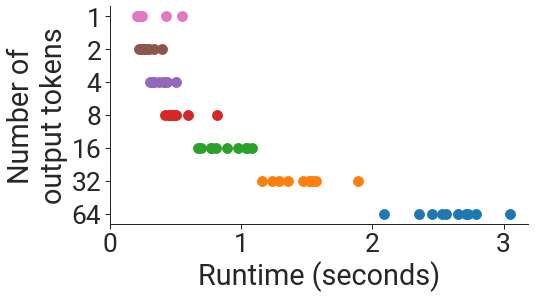

openai/davinci, prompt_size=256
openai/davinci, 64, 0.07
openai/davinci, 32, 0.14
openai/davinci, 16, 0.10
openai/davinci, 8, 0.23
openai/davinci, 4, 0.24
openai/davinci, 2, 0.25
openai/davinci, 1, 0.11
Average coefficient of variation: 0.16


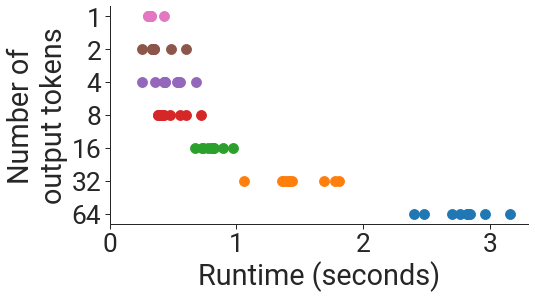

openai/davinci, prompt_size=512
openai/davinci, 64, 0.09
openai/davinci, 32, 0.21
openai/davinci, 16, 0.12
openai/davinci, 8, 0.26
openai/davinci, 4, 0.31
openai/davinci, 2, 0.13
openai/davinci, 1, 0.05
Average coefficient of variation: 0.17


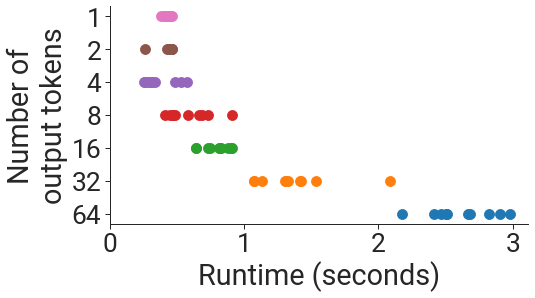

openai/davinci, prompt_size=1024
openai/davinci, 64, 0.15
openai/davinci, 32, 0.17
openai/davinci, 16, 0.32
openai/davinci, 8, 0.08
openai/davinci, 4, 0.44
openai/davinci, 2, 0.41
openai/davinci, 1, 0.18
Average coefficient of variation: 0.25


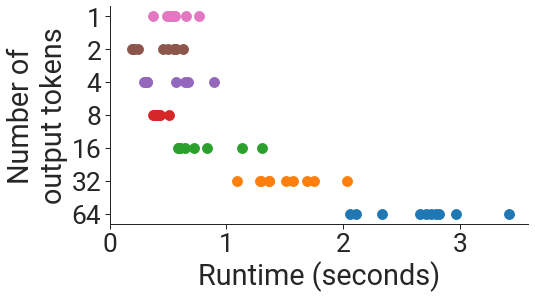

openai/davinci, prompt_size=1536
openai/davinci, 64, 0.08
openai/davinci, 32, 0.22
openai/davinci, 16, 0.29
openai/davinci, 8, 0.13
openai/davinci, 4, 0.32
openai/davinci, 2, 0.45
openai/davinci, 1, 0.42
Average coefficient of variation: 0.27


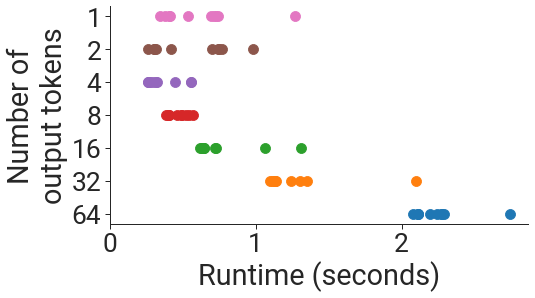

openai/text-davinci-002, prompt_size=1
openai/text-davinci-002, 64, 0.13
openai/text-davinci-002, 32, 0.19
openai/text-davinci-002, 16, 0.43
openai/text-davinci-002, 8, 0.38
openai/text-davinci-002, 4, 1.11
openai/text-davinci-002, 2, 0.86
openai/text-davinci-002, 1, 0.58
Average coefficient of variation: 0.53


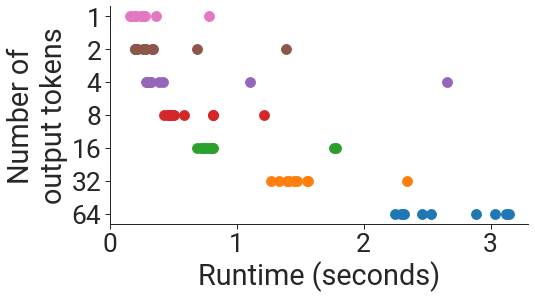

openai/text-davinci-002, prompt_size=256
openai/text-davinci-002, 64, 0.10
openai/text-davinci-002, 32, 0.27
openai/text-davinci-002, 16, 0.29
openai/text-davinci-002, 8, 0.32
openai/text-davinci-002, 4, 0.84
openai/text-davinci-002, 2, 0.16
openai/text-davinci-002, 1, 0.34
Average coefficient of variation: 0.33


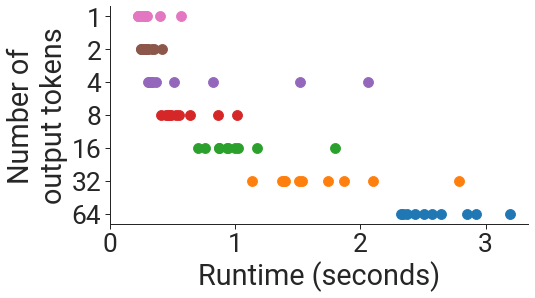

openai/text-davinci-002, prompt_size=512
openai/text-davinci-002, 64, 0.18
openai/text-davinci-002, 32, 0.31
openai/text-davinci-002, 16, 0.30
openai/text-davinci-002, 8, 0.35
openai/text-davinci-002, 4, 0.55
openai/text-davinci-002, 2, 0.62
openai/text-davinci-002, 1, 0.70
Average coefficient of variation: 0.43


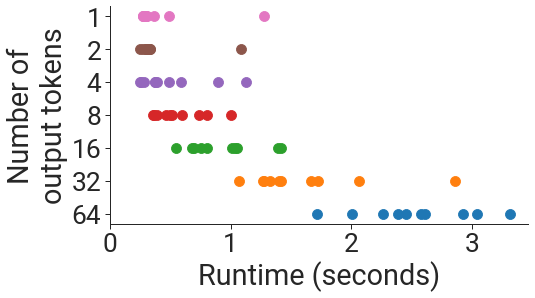

openai/text-davinci-002, prompt_size=1024
openai/text-davinci-002, 64, 0.17
openai/text-davinci-002, 32, 0.25
openai/text-davinci-002, 16, 0.43
openai/text-davinci-002, 8, 0.58
openai/text-davinci-002, 4, 0.38
openai/text-davinci-002, 2, 0.38
openai/text-davinci-002, 1, 0.27
Average coefficient of variation: 0.35


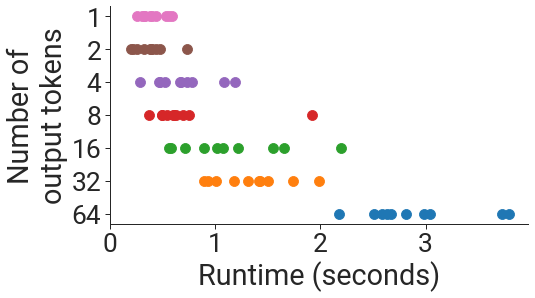

openai/text-davinci-002, prompt_size=1536
openai/text-davinci-002, 64, 0.25
openai/text-davinci-002, 32, 0.16
openai/text-davinci-002, 16, 0.27
openai/text-davinci-002, 8, 0.40
openai/text-davinci-002, 4, 0.63
openai/text-davinci-002, 2, 0.37
openai/text-davinci-002, 1, 0.38
Average coefficient of variation: 0.35


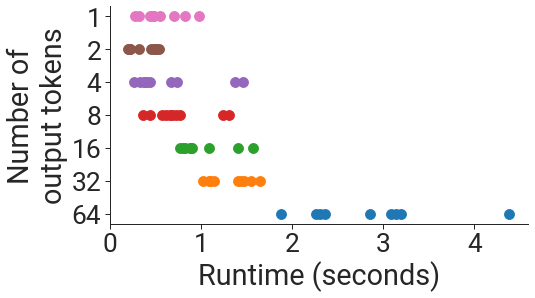

In [4]:
for model in ["ai21/j1-large", "ai21/j1-grande", "ai21/j1-jumbo",
              "openai/davinci", "openai/text-davinci-002"]:
    for num_prompt_tokens in [1, 256, 512, 1024, 1536]:
        plot(model, num_prompt_tokens)